In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
temp = pd.read_csv("/content/drive/MyDrive/Minor Final/Dataset/Final_Dataset/cauli_local.csv")

In [6]:
temp.drop('Commodity', axis=1, inplace=True)

In [7]:
temp.head()

,Date,Average
0,6/16/2013,32.5
1,6/17/2013,27.5
2,6/18/2013,27.5
3,6/19/2013,27.5
4,6/20/2013,22.5


In [8]:
#Normalizing the average column
scaler = MinMaxScaler()
temp['Average'] = scaler.fit_transform(temp['Average'].values.reshape(-1, 1))

In [9]:
#converting date to datetime format and using date as index
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Date'] = temp['Date'].dt.strftime('%m-%d-%Y')
temp.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

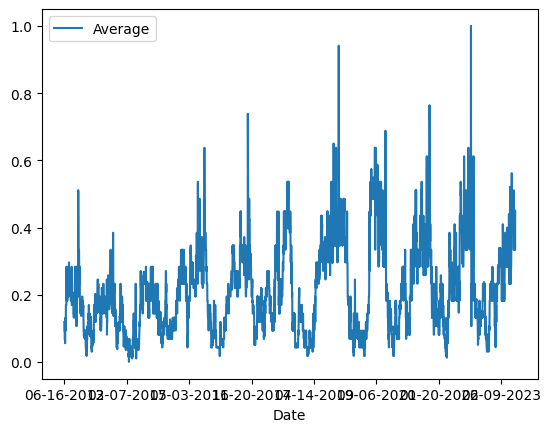

In [ ]:
temp.plot()

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)

In [ ]:
X1.shape, y1.shape

((3607, 5, 1, 1), (3607, 1))

In [ ]:
X1= np.squeeze(X1)
y1 = np.squeeze(y1)
# Print the new shapes
print(X1.shape, y1.shape)

(3607, 5) (3607,)


In [ ]:
X_train1, y_train1 = X1[:2500], y1[:2500]
X_val1, y_val1 = X1[2500:3000], y1[2500:3000]
X_test1, y_test1 = X1[3000:], y1[3000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((2500, 5), (2500,), (500, 5), (500,), (607, 5), (607,))

In [ ]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.001),
    metrics=[RootMeanSquaredError(), MeanAbsoluteError()]
)

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
79/79 [==============================] - 8s 73ms/step - loss: 0.0094 - root_mean_squared_error: 0.0971 - mean_absolute_error: 0.0654 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640 - val_mean_absolute_error: 0.0456
Epoch 2/100
79/79 [==============================] - 5s 70ms/step - loss: 0.0021 - root_mean_squared_error: 0.0460 - mean_absolute_error: 0.0310 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0628 - val_mean_absolute_error: 0.0447
Epoch 3/100
79/79 [==============================] - 4s 52ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - mean_absolute_error: 0.0308 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0614 - val_mean_absolute_error: 0.0439
Epoch 4/100
79/79 [==============================] - 1s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0447 - mean_absolute_error: 0.0303 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0618 - val_mean_absolute_error: 0.0442
Epoch 5/100
79/79 [==============================] - 6s 7

In [ ]:
# model1 = load_model('model1/')

In [10]:
model1 = load_model("/content/drive/MyDrive/Minor Final/LSTM_Finals model/LSTM_cauli_model.h5")

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

79/79 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,0.084761,0.065766
1,0.078485,0.068296
2,0.078526,0.055648
3,0.068832,0.093590
4,0.094008,0.093590
...,...,...
2495,0.544192,0.536247
2496,0.539743,0.536247
2497,0.537873,0.536247
2498,0.534473,0.536247


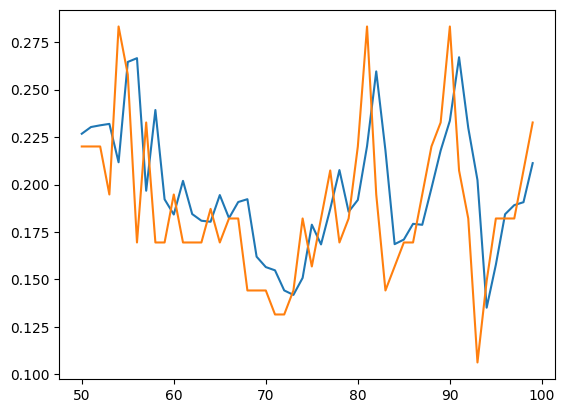

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results.tail()

16/16 [==============================] - 0s 4ms/step


,Val Predictions,Actuals
495,0.102640,0.106238
496,0.114150,0.106238
497,0.115441,0.131532
498,0.134235,0.080943
499,0.100304,0.131532


In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

19/19 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
0,0.131847,0.182122
1,0.166420,0.131532
2,0.146860,0.182122
3,0.178916,0.182122
4,0.189504,0.182122
...,...,...
602,0.360101,0.384479
603,0.388149,0.384479
604,0.388521,0.399656
605,0.396269,0.333890


In [ ]:
#TEST MSE,MAE and RMSC
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test1, test_predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, test_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [ ]:
#Print MSE,MAE and RMSC
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.0031726935254806775
Mean Absolute Error (MAE): 0.03557707194282754
Root Mean Squared Error (RMSE): 0.056326667977794294


In [ ]:
# Calculate R^2 score
r2score = r2_score(y_test1, test_predictions)

print("R^2 Score:", r2score)
accuracy_percentage = r2score * 100
print("Accuracy (R^2 Score) in Percentage:", accuracy_percentage)

R^2 Score: 0.8165699548444849
Accuracy (R^2 Score) in Percentage: 81.65699548444849


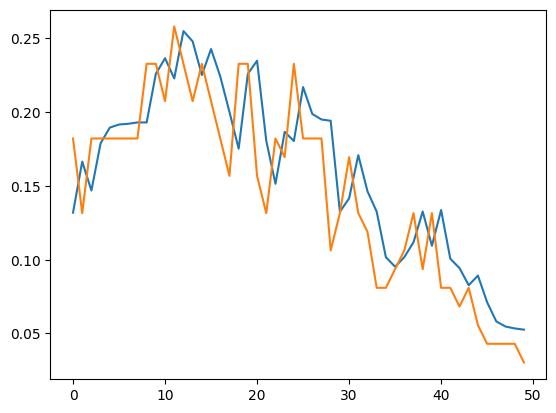

In [ ]:
plt.plot(test_results['Test Predictions'][:50])
plt.plot(test_results['Actuals'][:50])

In [11]:
future_steps = 50
# Start with the last sequence from the test set
current_sequence = [0.39232334 ,0.39774334, 0.40259689 ,0.40713298 ,0.41148993]

# Initialize an array to store the forecasted values
forecasted_values = []

# Iterate to predict future steps
for i in range(future_steps):
    # Predict the next value
    next_value_normalized = model1.predict(np.expand_dims(current_sequence, axis=0))[0][0]

    # Denormalize the predicted value
    next_value = scaler.inverse_transform([[next_value_normalized]])[0][0]

    # Append the denormalized predicted value to the forecasted values
    forecasted_values.append(next_value)

    # Update the current sequence by removing the first element and adding the predicted value at the end
    current_sequence = np.append(current_sequence[1:], next_value_normalized)

# Print the forecasted values
print("Forecasted Values for the next", future_steps, "steps:", forecasted_values)

1/1 [==============================] - 0s 24ms/step
Forecasted Values for the next 50 steps: [91.18048892587423, 91.98711164206266, 92.75646184265612, 93.49124939918516, 94.193801266551, 94.8654016882181, 95.50649838209151, 96.11794554680584, 96.70080945789813, 97.25616228193043, 97.78499371111391, 98.2882993286848, 98.76706293582914, 99.22224476963281, 99.65481095820664, 100.06569817453622, 100.45584309160708, 100.82612936317919, 101.17743475198745, 101.5106075656414, 101.8264784386754, 102.12585444152354, 102.4094955164194, 102.67816160559653, 102.9325596320629, 103.17340240985153, 103.40132027864455, 103.6170024883747, 103.82102046847342, 104.01399866759776, 104.19646138697861, 104.36896238297223, 104.5320259568095, 104.68612339049577, 104.83173185706137, 104.96930496543645, 105.09925508737562, 105.22200048565864, 105.33792407691477, 105.44737343162296, 105.55070790231227, 105.64827505946158, 105.74037534534929, 105.82731509327887, 105.90935939937829, 105.98677335977553, 106.0598338

In [ ]:
print(current_sequence)

[0.39232334 0.39774334 0.40259689 0.40713298 0.41148993]


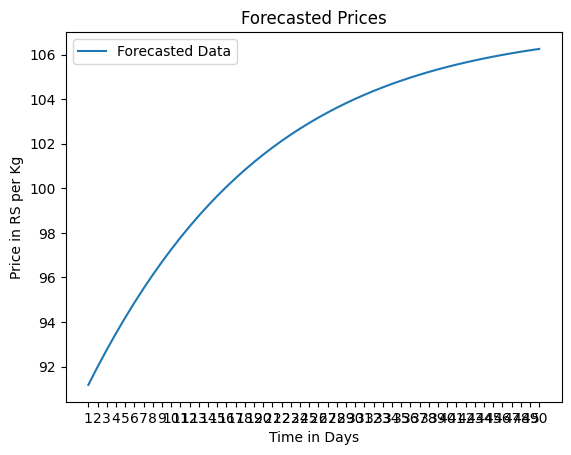

In [12]:
# Plot forecasted values
plt.plot(range(1, future_steps + 1), forecasted_values, label='Forecasted Data')

# Set labels and title
plt.xlabel('Time in Days')
plt.ylabel('Price in RS per Kg')
plt.title('Forecasted Prices')
plt.legend()

# Set x-axis ticks to show 1, 2, 3, ..., future_steps
plt.xticks(range(1, future_steps + 1))

# Show plot
plt.show()